In [56]:
import numpy as np
import matplotlib.pyplot as plt

In [57]:
#-------------------------------------
# Begin Function Declarations
#-------------------------------------

In [58]:
# For Even Junctions

def EvenArrayOfJunctions(sigma, numOfJunctions, width, arrayJ = []): # Generates an array of junctions given some standard deviation & mean width
    # Necessary Declarations
    junctionCenter = 1/(numOfJunctions - 1) # Declares the middle of the junction assuming zero junction width
    arrOfWidthsDiv2 = np.zeros(numOfJunctions//2)
    arrOfJunctions =  np.zeros(numOfJunctions * 2)
    arrayOfWidths = np.zeros(numOfJunctions)

    # Evolution of the squared terms for standard deviation for even junctions, derived by me. (Assuming linear fit)
    delta = 4 / (numOfJunctions + 2) * sigma**2
    # If standard deviation is 0 and the inputted array is custom, return the array
    if sigma == 0 and len(arrayJ) != 0:
        return arrayJ

    # Creates the list of the terms generated by the delta, without accounting for the mean
    # NOT THE TRUE STANDARD DEVIATION - Need to account for both positives and minuses, this is just positive
    for i in range(1, numOfJunctions//2 + 1):
        arrOfWidthsDiv2[i - 1] = np.sqrt(i * delta)
    arrayOfWidths = np.concatenate((np.flip(arrOfWidthsDiv2), arrOfWidthsDiv2))
    # If the user inputted a custom array
    if (len(arrayJ) != 0):
        arrOfJunctions = np.array(arrayJ)
        arrOfJunctions[1] = arrayJ[1] + arrOfWidthsDiv2[0] # Intializes the first junction, necessary otherwise the for-loop breaks
        # For each junction in the inputted array
        for k in range(2, arrOfJunctions.size - 2, 2):
            arrOfJunctions[k] = arrayJ[k] - (arrayOfWidths[k//2]) # Even "expansion" of the junctions
            arrOfJunctions[k + 1] = arrayJ[k + 1] + (arrayOfWidths[k//2]) # Even "expansion" of the junctions
        arrOfJunctions[-2] = arrayJ[-2] - arrOfWidthsDiv2[-1] # Hard sets the last junction, also necessary otherwise for-loop breaks
        arrOfJunctions[-1] = 1 # Hard sets the last junction, not accounted for in the for-loop
    else:
        correctional_last_term = 0.0001 # Necessary for the last junction due to it being an odd # of junctions
        arrOfJunctions[1] = width + arrayOfWidths[0] # Intializes the first junction, necessary otherwise the for-loop breaks
        for k in range(2, arrOfJunctions.size - 2, 2):
            arrOfJunctions[k] = k//2 * junctionCenter - (width + arrayOfWidths[k//2]) # Even "expansion" of the junctions
            arrOfJunctions[k + 1] = k//2 * junctionCenter + (width + arrayOfWidths[k//2]) # Even "expansion" of the junctions
        arrOfJunctions[-2] = 1 - (arrayOfWidths[-1] + correctional_last_term) # Hard sets the last junction, also necessary otherwise for-loop breaks
        arrOfJunctions[-1] = 1 # Hard sets the last junction, not accounted for in the for-loop
    return arrOfJunctions

In [59]:
# For Odd Junctions

def OddArrayOfJunctions(sigma, numOfJunctions, width, arrayJ = []): # Generates an array of junctions given some standard deviation & mean width
    # Necessary Declarations
    junctionCenter = 1/(numOfJunctions - 1) # Declares the middle of the junction assuming zero junction width
    arrOfWidthsDiv2 = np.zeros(numOfJunctions//2 + 1)
    arrOfJunctions = np.zeros(numOfJunctions * 2)

    # Evolution of the squared terms for standard deviation for odd junctions, derived by me. (Assuming linear fit)
    delta = (4 * numOfJunctions * sigma**2)/((numOfJunctions - 1) * (numOfJunctions + 1))

    # If standard deviation is 0 and the inputted array is custom, return the array
    if sigma == 0 and len(arrayJ) != 0:
        return arrayJ
    
    # Creates the list of the terms generated by the delta, without accounting for the mean
    # NOT THE TRUE STANDARD DEVIATION - Need to account for both positives and minuses, this is just positive
    for i in range(1, numOfJunctions//2 + 2):
        arrOfWidthsDiv2[i - 1] = np.sqrt((i-1) * delta)
    arrayOfWidths = np.concatenate((np.flip(arrOfWidthsDiv2[1:]), arrOfWidthsDiv2))
    # If the user inputted a custom array
    if (len(arrayJ) != 0):
        arrOfJunctions = np.array(arrayJ)
        arrOfJunctions[1] = arrayJ[1] + arrayOfWidths[0] # Intializes the first junction, necessary otherwise the for-loop breaks
        # For each junction in the inputted array
        for k in range(2, arrOfJunctions.size - 2, 2):
            arrOfJunctions[k] = arrayJ[k] - (arrayOfWidths[k//2]) # Even "expansion" of the junctions
            arrOfJunctions[k + 1] = arrayJ[k + 1] + (arrayOfWidths[k//2]) # Even "expansion" of the junctions
        arrOfJunctions[-2] = arrayJ[-2] - arrayOfWidths[-1] # Hard sets the last junction, also necessary otherwise for-loop breaks
        arrOfJunctions[-1] = 1
    else:
        correctional_last_term = 0.0001 # Necessary for the last junction due to it being an odd # of junctions
        arrOfJunctions[1] = width + arrayOfWidths[0] # Intializes the first junction, necessary otherwise the for-loop breaks
        for k in range(2, arrOfJunctions.size - 2, 2):
            arrOfJunctions[k] = k//2 * junctionCenter - (width + arrayOfWidths[k//2]) # Even "expansion" of the junctions
            arrOfJunctions[k + 1] = k//2 * junctionCenter + (width + arrayOfWidths[k//2]) # Even "expansion" of the junctions
        arrOfJunctions[-2] = 1 - (arrayOfWidths[-1] + correctional_last_term) # Hard sets the last junction, also necessary otherwise for-loop breaks
        arrOfJunctions[-1] = 1 # Hard sets the last junction, not accounted for in the for-loop
    return arrOfJunctions

In [60]:
def current(B, arrJ, arrC, y, numOfSegments): # y is initial phase difference of the whole circuit, B is the magnetic field, arrJ is the location of junctions, arrC is critical current associated with each junction
    curr = 0 # summation of all currents in the entire junction
    limit = int(len(arrJ) / 2) # number of junctions in the SQUID
    for n in range(limit):
        sizeOfSegment = float((arrJ[2 * n + 1] - arrJ[2 * n]) / numOfSegments)
        for i in range(numOfSegments):
            curr += arrC[n] * np.sin(y + (2 * np.pi * B) * (arrJ[2 * n] + i * sizeOfSegment)) * (1/numOfSegments)

    # phase difference evolves according to 2 * pi * B

    # curr += (critical current element in array)(sin(y + (2 * pi * B) * length)
    return curr

In [61]:
def ArrayOfJunctions(sigma, numOfJunctions, width, arrayJ):
    if (numOfJunctions % 2 == 0):
        return EvenArrayOfJunctions(sigma, numOfJunctions, width, arrayJ)
    else:
        return OddArrayOfJunctions(sigma, numOfJunctions, width, arrayJ)

# Prints out the # of junctions and the mean space occupied by the junctions
def stateOfArray(arrJ):
    state = []
    state.append(len(arrJ)//2)
    mean = 0
    for i in range(len(arrJ)//2):
        mean += (arrJ[2*i + 1] - arrJ[2*i])
    state.append(mean/(len(arrJ)//2))
    return state

# Prints out the percentage occupied by the non-current flowing areas
def meanOfArray(arrJ):
    percentage = 0
    for i in range(len(arrJ) // 2):
        percentage += (arrJ[2 * i + 1] - arrJ[2 * i]) / 2
    return  1 - percentage

# Checks whether junctions in the outputted array overlap with each other
def checkArray(arrJ):
    arr = arrJ.copy()
    if not np.array_equal(arr, sorted(arr)):
        if arr[1] > arr[2]:
            arr[1] = arr[2]
        for i in range(2, len(arr)//2 - 1):
            if arr[2 * i + 1] > arr[2 * i + 2]: # If the left end of the junction is greater than the right end of the adjacent junction
                arr[2*i + 1] = arr[2*i + 2]
            if arr[2 * i] > arr[2 * i + 1]: # If the left end of the junction is greater than the right end
                arr[2 * i] = arr[2 * i - 1]
            
    return arr

def maxCurrent(B, arrayJ, arrayC, segments): # Spits out the maximum current by varying the gauge invariant phase of the left end (free parameter) gamma
    Y=np.linspace(0, 2*np.pi, 150)
    dummyArray=[]
    for gamma in Y:
        dummyArray.append(current(B, arrayJ, arrayC, gamma, segments))
    return max(dummyArray)


In [62]:
def criticalCurrent(density, arrJ):
    criticalCurrents = []
    junctionWidths = []
    for i in range(len(arrJ)//2):
        junctionWidths.append(arrJ[2*i+1] - arrJ[2*i])
    for i in range (len(junctionWidths)):
        criticalCurrents.append(junctionWidths[i] * density[i])
    return criticalCurrents, junctionWidths

In [63]:
#-------------------------------------
# End Function Declarations
#-------------------------------------

In [64]:
#-------------------------------------
# Begin Variable Declarations
#-------------------------------------

FluxField = np.linspace(-10, 10, 4000) # an array of Magnetic Fields ranging from 0 to 100 with 5000 total elements

#----------------------------------

arrayOfJunctions = []

# arrayOfJunctions = [0, 0.001, 0.3, 0.33, 0.9, 1]

# arrayOfJunctions = [0, 0.02, 0.99, 1]

# arrayOfJunctions = [0, 0.01, 0.03, 0.13, 0.14, 0.142, 0.16, 0.36, 0.38, 0.68, 0.681, 0.688, 0.7, 0.75, 0.77, 0.83, 0.84, 0.841, 0.89, 1]

arrayOfJunctions = [0, 0.2, 0.4, 0.6, 0.9, 1]

# arrayOfJunctions = [0, 0.2, 0.35, 0.6, 0.7, 0.8, 0.9, 1]

number_of_junctions = 5 

junctionNumber = stateOfArray(arrayOfJunctions)[0] if (len(arrayOfJunctions) != 0) else number_of_junctions

critical_currents_density = np.ones(int(junctionNumber)) # all the critical currents for each junction (Critical Currents are assumed to be 1 by default)

#----------------------------------

IMaxPointSigma1 = []

IMaxPointSigma2 = []

IMaxPointSigma3 = []

meanWidth = stateOfArray(arrayOfJunctions)[1] if (len(arrayOfJunctions) != 0) else 0.0001


#----------------------------------

Sigma1 = 0

arraySigma1 = checkArray(ArrayOfJunctions(Sigma1, junctionNumber, meanWidth, arrayOfJunctions))

percentageSigma1 = meanOfArray(arraySigma1)

criticalCurrent_1, junction_width_1 = criticalCurrent(critical_currents_density, arraySigma1)

#----------------------------------

Sigma2 = 0.05

arraySigma2 = checkArray(ArrayOfJunctions(Sigma2, junctionNumber, meanWidth, arrayOfJunctions))

percentageSigma2 = meanOfArray(arraySigma2)

criticalCurrent_2, junction_width_2 = criticalCurrent(critical_currents_density, arraySigma2)

#----------------------------------

Sigma3 = 0.1

arraySigma3 = checkArray(ArrayOfJunctions(Sigma3, junctionNumber, meanWidth, arrayOfJunctions))

percentageSigma3 = meanOfArray(arraySigma3)

criticalCurrent_3, junction_width_3 = criticalCurrent(critical_currents_density, arraySigma3)

#--------------------------------------------------

numOfSegments = 5

norm_1 = np.sum(criticalCurrent_1)

norm_2 = np.sum(criticalCurrent_2)

norm_3 = np.sum(criticalCurrent_3)



In [65]:
for f in FluxField:
    IMaxPointSigma1.append(maxCurrent(f, arraySigma1, criticalCurrent_1, numOfSegments)/norm_1) # This integer represents the number of segments you want to cut each junction up into (the higher the number, the better the approximation)
print(arraySigma1)
for f in FluxField:
    IMaxPointSigma2.append(maxCurrent(f, arraySigma2, criticalCurrent_2, numOfSegments)/norm_2)
print(arraySigma2)
for f in FluxField:
    IMaxPointSigma3.append(maxCurrent(f, arraySigma3, criticalCurrent_3, numOfSegments)/norm_3)
print(arraySigma3)

[0, 0.2, 0.4, 0.6, 0.9, 1]
[0.         0.26123724 0.4        0.6        0.83876276 1.        ]
[0.         0.32247449 0.4        0.6        0.77752551 1.        ]


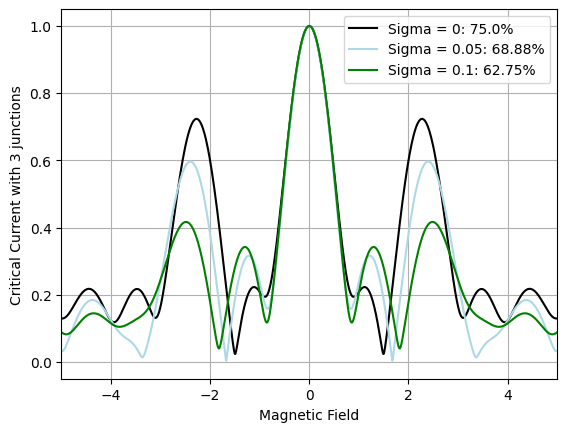

In [66]:
plt.figure(300)
plt.plot(FluxField, IMaxPointSigma1, 'black' , label="Sigma = " + str(Sigma1) + ": " + str(round(percentageSigma1 * 100, 2)) + "%")
plt.plot(FluxField, IMaxPointSigma2, '#ADD8E6', label="Sigma = " + str(Sigma2) + ": " + str(round(percentageSigma2 * 100, 2)) + "%")
plt.plot(FluxField, IMaxPointSigma3, 'green', label="Sigma = " + str(Sigma3) + ": " + str(round(percentageSigma3 * 100, 2)) + "%")
plt.legend(loc="upper right", frameon=True)
plt.xlabel('Magnetic Field')
plt.ylabel('Critical Current with ' + str(junctionNumber) + ' junctions')  
plt.xlim(-5,5)
# plt.ylim(0,1)
plt.grid()             
plt.show()

In [67]:
print(criticalCurrent_1)
print(criticalCurrent_2)
print(criticalCurrent_3)


[0.2, 0.19999999999999996, 0.09999999999999998]
[0.26123724356957945, 0.19999999999999996, 0.16123724356957947]
[0.32247448713915894, 0.19999999999999996, 0.22247448713915885]
